In [3]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

#train the network

model = tf.keras.models.Sequential([
	tf.keras.layers.Dense(32, activation=tf.nn.relu, activity_regularizer=tf.keras.regularizers.l1(10e-5)),
	tf.keras.layers.Dense(784, activation=tf.nn.sigmoid)])

model.compile(optimizer="Adadelta",
	loss="binary_crossentropy",
	metrics=["accuracy"])

(x_train, _), (x_validate, _) = mnist.load_data()
x_train, x_validate = x_train / 255.0, x_validate / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_validate = x_validate.reshape((len(x_validate), np.prod(x_validate.shape[1:])))

model.fit(x_train, x_train, epochs = 5)
model.evaluate(x_validate, x_validate)

Epoch 1/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.2381 - acc: 0.7922
Epoch 2/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.1650 - acc: 0.8044
Epoch 3/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.1405 - acc: 0.8085
Epoch 4/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.1252 - acc: 0.8109
Epoch 5/5
10000/10000 [==============================] - 1s 66us/step


[0.1091793782234192, 0.8119029314994812]

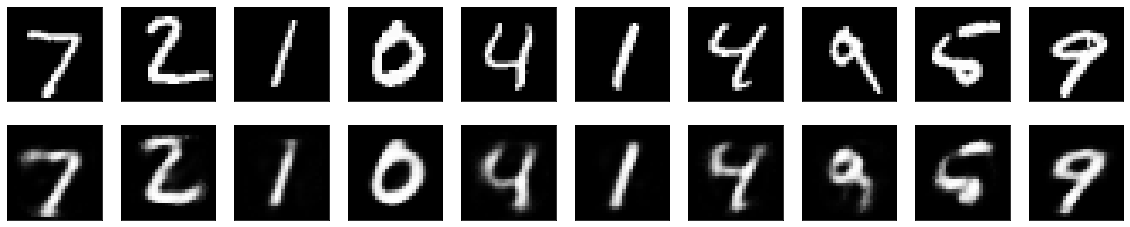

In [4]:
#decode images

decoded_image = model.predict(x_validate)

#graph results

n=10
plt.figure(figsize=(20,4))
for i in range(n):
	
	image = plt.subplot(2, n, i + 1)
	plt.imshow(x_validate[i].reshape(28,28))
	plt.gray()
	image.get_xaxis().set_visible(False)
	image.get_yaxis().set_visible(False)

	image = plt.subplot(2, n, i + 1 + n)
	plt.imshow(decoded_image[i].reshape(28,28))
	plt.gray()
	image.get_xaxis().set_visible(False)
	image.get_yaxis().set_visible(False)